In [2]:
import warnings
warnings.filterwarnings("ignore")

In [137]:
import numpy as np
import pandas as pd
import os
import datetime

import matplotlib.pyplot as plt

In [4]:
for file in os.listdir("./voldata"):
    print(file)

SPFB.BR_220110_220731.txt
SPFB.ED_220110_220731.txt
SPFB.Eu_220110_220731.txt
SPFB.GAZR_220110_220731.txt
SPFB.GOLD_220110_220731.txt
SPFB.NG_220601_220731.txt
SPFB.RTS_220110_220731.txt
SPFB.SBRF_220110_220731.txt
SPFB.Si_220110_220731.txt


In [5]:
df = pd.read_csv("./voldata/SPFB.NG_220601_220731.txt", sep=',')

In [8]:
df

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,SPFB.NG-6.22,1,20220601,100000,8.530,8.530,8.270,8.335,971
1,SPFB.NG-6.22,1,20220601,100100,8.335,8.359,8.335,8.350,229
2,SPFB.NG-6.22,1,20220601,100200,8.353,8.365,8.353,8.359,173
3,SPFB.NG-6.22,1,20220601,100300,8.359,8.360,8.344,8.357,92
4,SPFB.NG-6.22,1,20220601,100400,8.357,8.366,8.357,8.366,79
...,...,...,...,...,...,...,...,...,...
22291,SPFB.NG-7.22,1,20220727,135500,8.994,8.994,8.994,8.994,1
22292,SPFB.NG-7.22,1,20220727,135600,8.994,8.994,8.994,8.994,4
22293,SPFB.NG-7.22,1,20220727,135700,8.994,8.994,8.994,8.994,12
22294,SPFB.NG-7.22,1,20220727,135800,8.994,8.994,8.993,8.993,10


In [104]:
def get_diff_series(file_name):
    apply_diff = lambda x: x[-1] - x[0]
    
    df = pd.read_csv(file_name, sep=',')
    
    ts = pd.Series(df['<CLOSE>'].values, 
               index = pd.to_datetime(df['<DATE>'], format='%Y%m%d') 
                    + (pd.to_datetime(df['<TIME>'], format='%H%M%S') - pd.to_datetime('1900-01-01')))
    
    # percentile filtering
    ts = ts.rolling(window=datetime.timedelta(hours=1)).apply(apply_diff).dropna()
    p01, p99 = np.percentile(ts, [1, 99])
    return ts[(p01 < ts) & (ts < p99)] 

In [142]:
def get_vol_series(diffts, period, shifts=0):
    if isinstance(shifts, int):
        return diffts[shifts::60].rolling(window=period).std().dropna()
    
    stds = []
    min_len = np.inf
    for s in shifts:
        ts = diffts[s::60].rolling(window=period).std().dropna()
        stds.append(ts)
        min_len = min(min_len, len(ts))
    stds = [row[-min_len:] for row in stds]
    stds = np.vstack(stds)
    return stds.mean(axis=0)

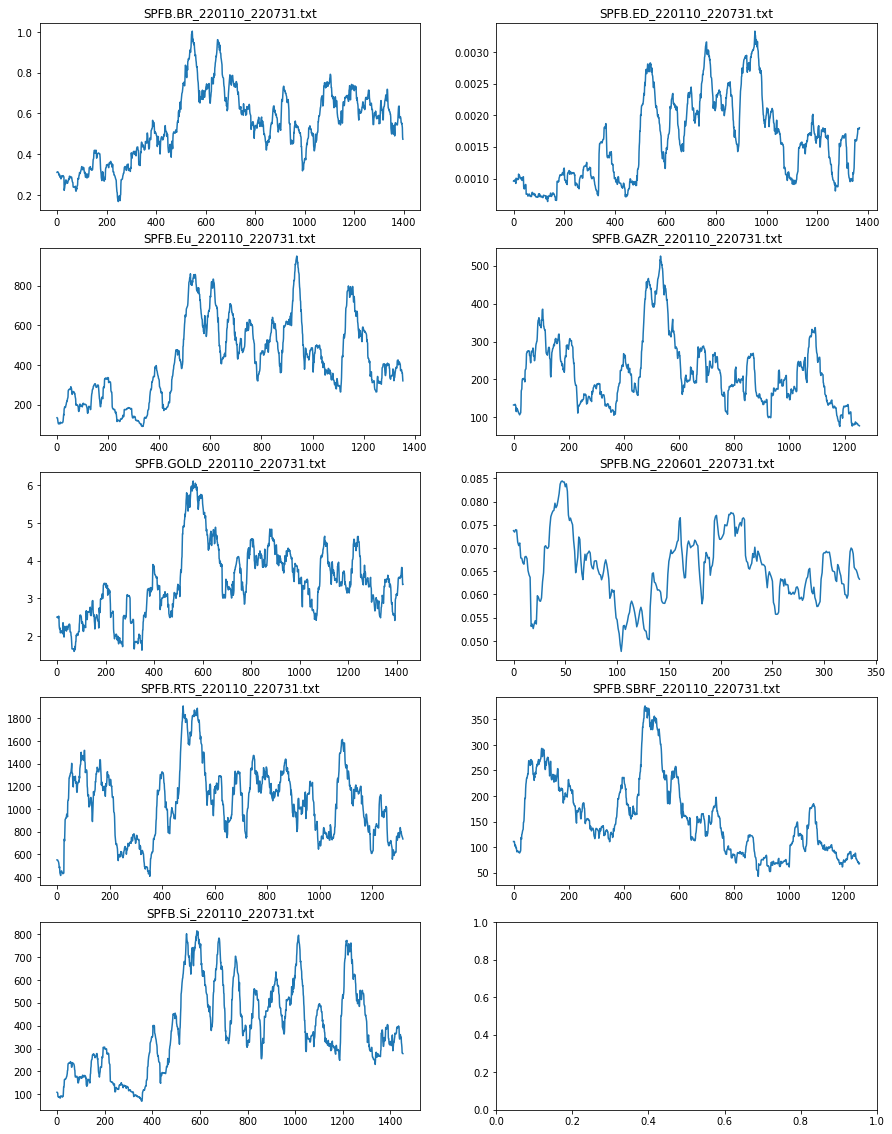

In [151]:
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

i_sbplot = 0
for file in os.listdir("./voldata"):
    diffts = get_diff_series("./voldata/" + file)
    
    stdts = get_vol_series(diffts, 30, [0, 15, 30, 45])
    
    axes.flat[i_sbplot].plot(stdts)
    axes.flat[i_sbplot].title.set_text(file)
    i_sbplot += 1

In [124]:
z[-3:]

[1, 2, 3]